Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [37]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\lvukelic\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [38]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).



In [39]:
from sklearn.preprocessing import PolynomialFeatures
degree = 1
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
X_poly

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [40]:
from numpy import linalg
w_1 = np.linalg.inv(X_poly.T @ X_poly)@ X_poly.T @ y
X_pseudoinv = np.linalg.pinv(X_poly)
w_2 = X_pseudoinv @ y.T
np.allclose(w_1, w_2)

True

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

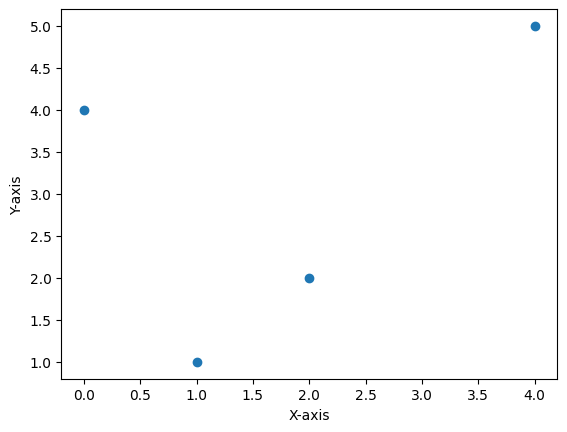

4.085714285714286


In [41]:
from sklearn.metrics import mean_squared_error

D = np.hstack((X, y.reshape(-1, 1)))
plt.scatter(X, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
h = X_poly @ w_1
E = np.sum((y - h) ** 2) / 2
print(E)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [42]:
try:
    w3 = linalg.inv(X_poly)@y
except Exception as e: 
    print(f"An error occurred: {e}")
    
degree = 3
poly = PolynomialFeatures(degree)
X_poly_d3 = poly.fit_transform(X)

try:
    w3 = linalg.inv(X_poly_d3)@y
    print(w3)
except Exception as e: 
    print(f"An error occurred: {e}")

An error occurred: Last 2 dimensions of the array must be square
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X,y)
w1,w2 = model.coef_, model.intercept_
print(w1,w2)

y_pred = model.predict(X)
E_lr = np.sum((y_pred - h) ** 2) / 2
print(f"MSE = {E_lr}")

[0.45714286] 2.2
MSE = 0.0


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [131]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    N = np.random.normal(0, noise, (X.shape[0], 1))
    return f(X) + N

def f(x):
    return 5 + x - 2*x**2 - 5*x**3 

In [132]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [130]:
D_x = make_instances(-5,5,50)
D_y = make_labels(D_x, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

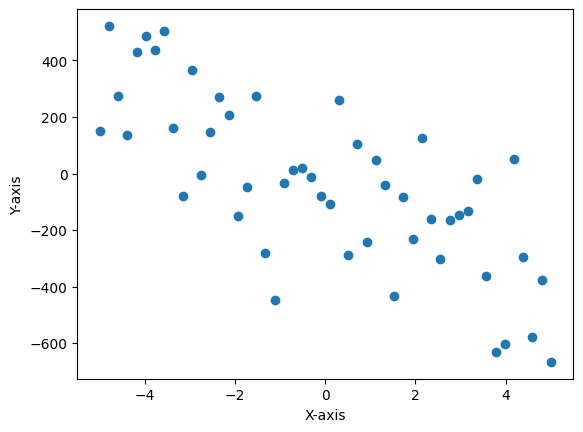

In [117]:
plt.scatter(D_x, D_y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

(4, 1)
(50, 4)


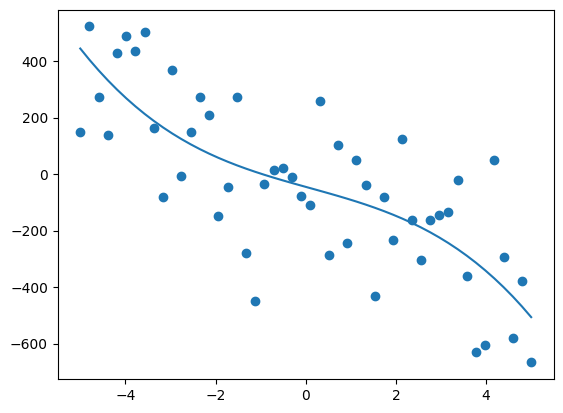

In [118]:
D_x_poly = poly.fit_transform(D_x)
X_pseudoinv = np.linalg.pinv(D_x_poly)
weights = X_pseudoinv @ D_y
print(weights.shape)
print(D_x_poly.shape)
h = D_x_poly @ weights
h = h.flatten().tolist()
plt.scatter(D_x, D_y)
plt.plot(D_x, h)

plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

MSE train with degree 1 = 44938.97786639407
MSE train with degree 3 = 34838.53506872836
MSE train with degree 5 = 34393.91219772026
MSE train with degree 10 = 30035.283383777994
MSE train with degree 20 = 19994.329037640015


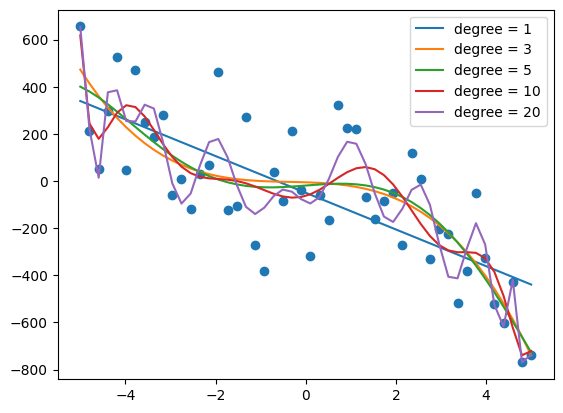

In [97]:
degrees = [1,3,5,10,20]
plt.scatter(D_x, D_y)

for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    D_x_poly = poly.fit_transform(D_x)
    X_pseudoinv = np.linalg.pinv(D_x_poly)
    weights = X_pseudoinv@D_y
    h_train = D_x_poly @ weights

    mse_train = mean_squared_error(D_y.flatten().tolist(), h_train)
    
    print(f"MSE train with degree {degree} = {mse_train}")
    plt.plot(D_x, h_train, label = f"degree = {degree}")
    
plt.legend()
plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

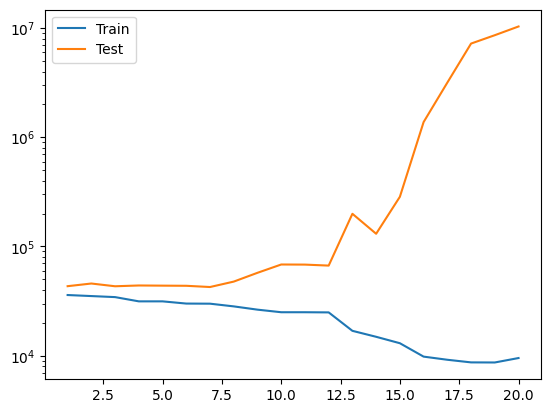

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(D_x, D_y, test_size=0.5)
degrees = list(range(1,21))

graph_train = {}
graph_test = {}

for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    X_poly_train = poly.fit_transform(X_train)
    X_pseudoinv = np.linalg.pinv(X_poly_train)
    weights = X_pseudoinv @ y_train
    h_train = X_poly_train @ weights

    X_poly_test = poly.fit_transform(X_test)
    h_test = X_poly_test @ weights

    mse_train = mean_squared_error(y_train.flatten().tolist(), h_train)
    mse_test = mean_squared_error(y_test.flatten().tolist(), h_test)
    graph_train[degree] = mse_train
    graph_test[degree] = mse_test

graph_train_keys = graph_train.keys()
graph_train_values = graph_train.values()
graph_test_keys = graph_test.keys()
graph_test_values = graph_test.values()

plt.plot(graph_train_keys, graph_train_values, label = f"Train")
plt.plot(graph_test_keys, graph_test_values, label = f"Test")
plt.yscale('log')

plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

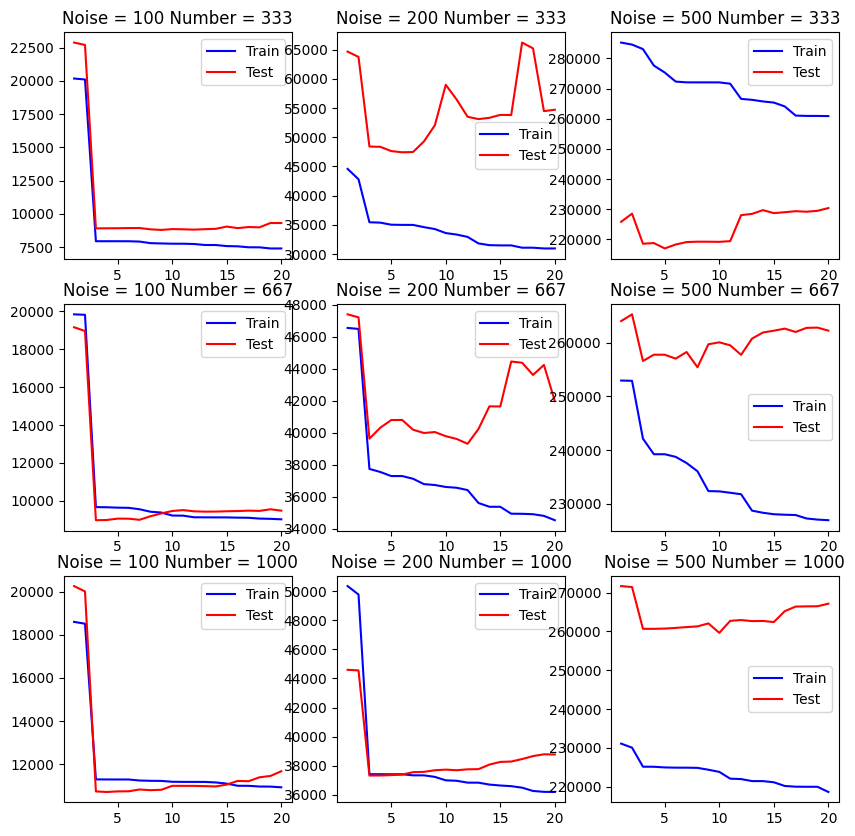

In [153]:
noises = [100, 200, 500]
numbers = [1000/3, 1000*2/3, 1000]
whole_dataset = []

for number in numbers:
    D_X = make_instances(-5,5,round(number))
    for noise in noises: 
        D_y = make_labels(D_X, f, noise)
        whole_dataset.append((D_X, D_y, noise, number))

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for index, (D_X, D_y, noise, number) in enumerate(whole_dataset): 
    X_train, X_test, y_train, y_test = train_test_split(D_X, D_y, test_size=0.5)

    for degree in degrees:
        poly = PolynomialFeatures(degree = degree)
        X_poly_train = poly.fit_transform(X_train)
        X_pseudoinv = np.linalg.pinv(X_poly_train)
        weights = X_pseudoinv @ y_train
        h_train = X_poly_train @ weights

        X_poly_test = poly.fit_transform(X_test)
        h_test = X_poly_test @ weights

        mse_train = mean_squared_error(y_train.flatten().tolist(), h_train)
        mse_test = mean_squared_error(y_test.flatten().tolist(), h_test)
        graph_train[degree] = mse_train
        graph_test[degree] = mse_test

    graph_train_keys = graph_train.keys()
    graph_train_values = graph_train.values()
    graph_test_keys = graph_test.keys()
    graph_test_values = graph_test.values()

    row_index = index // 3
    col_index = index % 3

    axs[row_index][col_index].plot(graph_train_keys, graph_train_values, color='blue', label = f"Train")
    axs[row_index][col_index].plot(graph_test_keys, graph_test_values, color='red', label = f"Test")
    axs[row_index][col_index].set_title(f'Noise = {noise} Number = {round(number)}')
    axs[row_index][col_index].legend()

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

Rezultati su očekivani. Veći broj primjera daje bolji model s manjom srednjom kvadratnom greškom. Šum vrijednosti 100 već je dovoljan faktor koji pomaže pri regularizaciji. 
Sve veći šumovi uzrokuju pogoršanje modela.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [34]:
factors = [0, 1, 10]
for factor in factors:
    weights = np.linalg.inv(X_poly_d3 @ X_poly_d3.T + factor*np.eye(X_poly_d3.shape[0])) @ X_poly_d3 @ y
    print(f"Lambda = {factor} --> w = {weights}")

Lambda = 0 -> w = [3.375      0.33333333 0.25       0.04166667]
Lambda = 1 -> w = [1.45324738 0.87141563 0.18125633 0.04083329]
Lambda = 10 -> w = [0.30803721 0.30186123 0.26944432 0.04028519]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [35]:
from sklearn.linear_model import Ridge
for factor in factors:
  ridge = Ridge(alpha=factor).fit(X_poly_d3, y)
  print(f"Lambda = {factor} --> Coef: {ridge.coef_} Intercept: {ridge.intercept_}") 

Lambda = 0 --> Coef: [ 0.         -5.91666667  3.375      -0.45833333] Intercept: 4.000000000000021
Lambda = 1 --> Coef: [ 0.         -0.69079365 -0.2831746   0.1445805 ] Intercept: 3.0569614512471652
Lambda = 10 --> Coef: [ 0.         -0.15897295 -0.13423067  0.0815601 ] Intercept: 2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

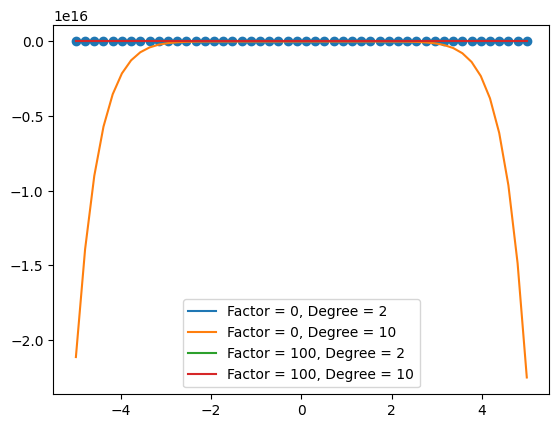

In [135]:
D_x = make_instances(-5,5,50)
D_y = make_labels(D_x, f, 200)
degrees = [2,10]
factors = [0,100]

plt.scatter(D_x, D_y)

for factor in factors:
    for degree in degrees: 
        poly = PolynomialFeatures(degree)
        D_x_poly = poly.fit_transform(D_x)
        m = factor*np.identity(D_x_poly.shape[0])
        m[0,0]=0
        weights = (np.linalg.inv(D_x_poly @ D_x_poly.T + m) @ D_x_poly).T @ D_y
        h = D_x_poly @ weights
        h = h.flatten()

        plt.plot(D_x, h, label = f"Factor = {factor}, Degree = {degree}")

plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [101]:
from sklearn.linear_model import Lasso

def poly_regression(X_train, X_test, y_train, y_test, degree, factors, lasso):
    mse_list_train = []
    mse_list_test = []
    poly = PolynomialFeatures(degree=degree)
    weights = []

    for factor in factors:
        X_poly = poly.fit_transform(X_train)

        if lasso:
           model = Lasso(alpha=factor).fit(X_poly, y_train)
        else: 
            model = Ridge(alpha=factor).fit(X_poly, y_train)
            
        y_pred_train = model.predict(X_poly)

        X_poly_test = poly.fit_transform(X_test)
        y_pred_test = model.predict(X_poly_test)

        weights.append(model.coef_)

        mse_list_train.append(np.log(mean_squared_error(y_train, y_pred_train)))
        mse_list_test.append(np.log(mean_squared_error(y_test, y_pred_test)))
    
    return mse_list_train, mse_list_test, weights

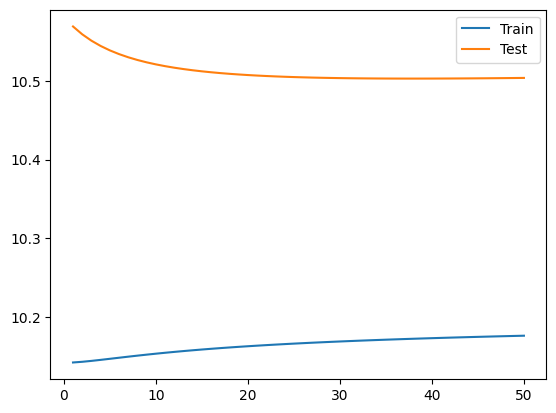

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

factors = list(range(1, 51))

X_train, X_test, y_train, y_test = train_test_split(D_x, D_y, test_size=0.5)

mse_list_train, mse_list_test = poly_regression(X_train, X_test, y_train, y_test, 5, factors)

plt.plot(factors, mse_list_train, label=f'Train')
plt.plot(factors, mse_list_test, label=f'Test')
plt.legend()
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [84]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

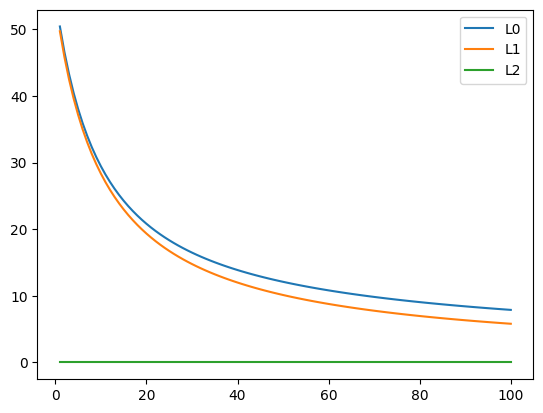

In [100]:
from sklearn.linear_model import Ridge

factors = list(range(1, 101))

MSE_list_train, MSE_list_test, weights = poly_regression(X_train, X_test, y_train, y_test, 5, factors, False)
l0 = []
l1 = []
l2 = []

for w in weights: 
    l0.append(np.linalg.norm(w))
    l1.append(np.linalg.norm(w, ord=1))
    l2.append(nonzeroes(w))

plt.plot(factors, l0, label=f'L0')
plt.plot(factors, l1, label=f'L1')
plt.plot(factors, l2, label=f'L2')

plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

c:\Users\lvukelic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+03, tolerance: 2.444e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\lvukelic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.974e+02, tolerance: 2.444e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\lvukelic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

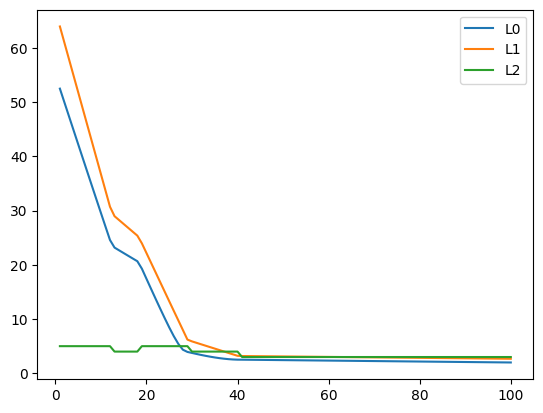

In [102]:
from sklearn.linear_model import Lasso
MSE_list_train, MSE_list_test, weights = poly_regression(X_train, X_test, y_train, y_test, 5, factors, True)
l0 = []
l1 = []
l2 = []

for w in weights: 
    l0.append(np.linalg.norm(w))
    l1.append(np.linalg.norm(w, ord=1))
    l2.append(nonzeroes(w))

plt.plot(factors, l0, label=f'L0')
plt.plot(factors, l1, label=f'L1')
plt.plot(factors, l2, label=f'L2')

plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [104]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

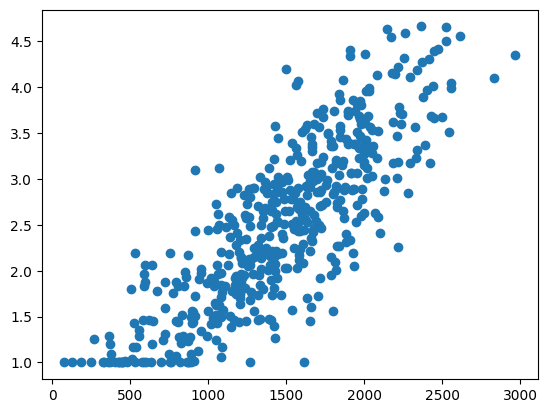

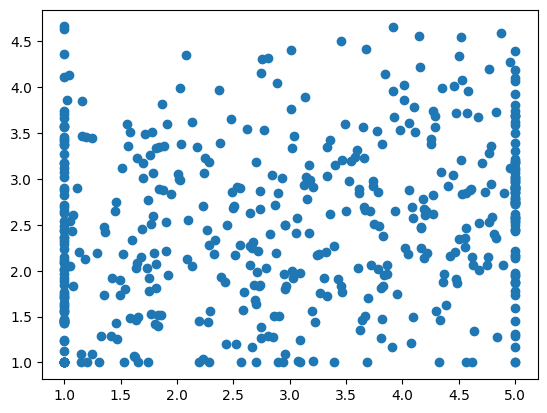

In [106]:
plt.scatter(exam_score, grades_y)
plt.show()
plt.scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [109]:
model = Ridge(alpha=0.01).fit(grades_X, grades_y)
print(model.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
model = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y)
print(model.coef_)

[0.73954683 0.13741539]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [122]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, grades_X_fixed[:, -1].reshape(-1,1)))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [123]:
model = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y)
print(model.coef_)

[0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [127]:
import statistics

sample_percentage = 50

num_rows = int(grades_X_fixed_colinear.shape[0] * (sample_percentage / 100.0))
factors = [0.01, 1000]

w_001 = []
w_1000 = []

for i in range(0, 10, 1):
    for factor in factors:
        grades_sampled = grades_X_fixed_colinear[np.random.choice(grades_X_fixed_colinear.shape[0], num_rows, replace=False)]
        model = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y)
        print(f"Model with factor {factor} and iteration {i} has weights --> {model.coef_}")
        if factor == 0.01: 
            w_001.append(model.coef_.flatten())
        else:
            w_1000.append(model.coef_.flatten())

w_1 = [w[0] for w in w_001]
w_2 = [w[1] for w in w_001]
w_3 = [w[2] for w in w_001]
w_4 = [w[0] for w in w_1000]
w_5 = [w[1] for w in w_1000]
w_6 = [w[2] for w in w_1000]

print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_1)}")
print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_2)}")
print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_3)}")
print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_4)}")
print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_5)}")
print(f"Standard deviation for w1 and lambda 0.01--> {statistics.stdev(w_6)}")



Model with factor 0.01 and iteration 0 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 1000 and iteration 0 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 0.01 and iteration 1 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 1000 and iteration 1 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 0.01 and iteration 2 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 1000 and iteration 2 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 0.01 and iteration 3 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 1000 and iteration 3 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 0.01 and iteration 4 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 1000 and iteration 4 has weights --> [0.73954673 0.06870839 0.06870839]
Model with factor 0.01 and iteration 5 has weights --> [0.73954673 0.06870839 0.06870839]
Model with

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.